In [1]:
import numpy as np

In [2]:
net_name = "Conv_2"

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9605801872490469338
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3450535936
locality {
  bus_id: 1
  links {
  }
}
incarnation: 591736628997738024
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [5]:
mode = 2

data_directory = "../DATASET/mode_" + str(mode) + "/downsampling/"

X_train = np.load(data_directory + "X_train.npy")
y_train = np.load(data_directory + "y_train.npy")

X_val = np.load(data_directory + "X_val.npy")
y_val = np.load(data_directory + "y_val.npy")

X_test = np.load(data_directory + "X_test.npy")
y_test = np.load(data_directory + "y_test.npy")

In [6]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(10595, 250, 2)
(2659, 250, 2)
(4433, 250, 2)


In [7]:
X_train_flat = X_train.reshape(-1, 500, 1)
X_val_flat = X_val.reshape(-1, 500, 1)
X_test_flat = X_test.reshape(-1, 500, 1)

In [8]:
X_train_flat.shape

(10595, 500, 1)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

seq_length = 500

model = Sequential()
model.add(Conv1D(64, 20, strides=2, activation='relu', input_shape=(seq_length, 1)))
model.add(BatchNormalization())

model.add(Conv1D(64, 20, strides=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(4))

model.add(Conv1D(128, 4, strides=2, activation='relu'))
model.add(BatchNormalization())

model.add(Conv1D(128, 4, strides=2, activation='relu'))
model.add(BatchNormalization())
model.add(GlobalAveragePooling1D())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [10]:
history = model.fit(X_train_flat, y_train, batch_size=32, epochs=200, validation_data=(X_val_flat, y_val), shuffle=True)

Train on 10595 samples, validate on 2659 samples
Epoch 1/25
10595/10595 [==============================] - 10s 943us/step - loss: 0.3624 - acc: 0.8613 - val_loss: 0.3575 - val_acc: 0.8672
Epoch 2/25
10595/10595 [==============================] - 3s 276us/step - loss: 0.3056 - acc: 0.8823 - val_loss: 0.2798 - val_acc: 0.9015
Epoch 3/25
10595/10595 [==============================] - 3s 277us/step - loss: 0.2941 - acc: 0.8901 - val_loss: 0.2980 - val_acc: 0.8954
Epoch 4/25
10595/10595 [==============================] - 3s 282us/step - loss: 0.2872 - acc: 0.8913 - val_loss: 0.2963 - val_acc: 0.9067
Epoch 5/25
10595/10595 [==============================] - 3s 281us/step - loss: 0.2769 - acc: 0.8942 - val_loss: 0.2583 - val_acc: 0.9090
Epoch 6/25
10595/10595 [==============================] - 3s 278us/step - loss: 0.2762 - acc: 0.8981 - val_loss: 0.2518 - val_acc: 0.9030
Epoch 7/25
10595/10595 [==============================] - 3s 277us/step - loss: 0.2683 - acc: 0.9006 - val_loss: 0.3721 - 

In [11]:
score = model.evaluate(X_val_flat, y_val, verbose=1, batch_size=16)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

2659/2659 [==============================] - 0s 112us/step
Validation loss: 0.2865608041512704
Validation accuracy: 0.9074840165475743


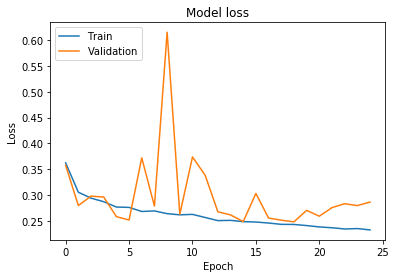

In [13]:
import matplotlib.pyplot as plt 

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
y_val_predict = (model.predict(X_val_flat) > 0.5).astype(np.uint8)

from sklearn.metrics import recall_score, precision_score, fbeta_score

print(precision_score(y_val, y_val_predict))
print(recall_score(y_val, y_val_predict))
print(fbeta_score(y_val, y_val_predict, beta=2))

0.9319148936170213
0.48775055679287305
0.5391432791728212


In [9]:
model.save("Models/mode_" + str(mode) + "/" + net_name + ".h5")

InternalError: Failed to create session.

In [68]:
from keras.utils import plot_model
plot_model(model, to_file=net_name+".png") 